In [ ]:
# Yêu cầu đưa ra chiến lược giải pháp cho bài toán phát hiện gian lận trong giao dịch. Bao gồm một số bước sau
# Data Description
# Feature Engineering
# Data Filtering
# Exploratory Data Analysis
# Data Preparation
# Feature Selection
# Machine Learning Modeling
# Conclusions
# Model Deploy(Docker)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV, KFold,cross_validate
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, roc_auc_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


In [32]:
df = pd.read_csv('data2.csv')

In [136]:
df.head()

,_id,label,f0,f1,f2,f3,f4,f5,f6,f7,...,f73,f74,f75,f76,f77,f78,f79,f80,f81,Unnamed: 84
0,667b34831b443137f25380e8,1,VIP0,0.0,-43.0,0.0,0.0,-43.0,-43.0,-43.0,...,0.0,238.0,238.0,238.0,238.0,238.0,238.0,238.0,243010,NaN
1,667b34831b443137f25380ea,1,VIP0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,189.0,189.0,189.0,189.0,189.0,189.0,189.0,236020,NaN
2,667b34831b443137f25380ec,1,VIP0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,236040,NaN
3,667b34831b443137f25380ee,1,VIP0,0.0,-24.0,0.0,0.0,-12.0,-12.0,-12.0,...,0.0,110.0,110.0,110.0,110.0,110.0,110.0,110.0,103010,NaN
4,667b34831b443137f2538292,1,VIP0,0.0,-38.0,0.0,0.0,-38.0,-38.0,-38.0,...,0.0,141.0,141.0,141.0,141.0,141.0,141.0,141.0,243010,NaN


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60080 entries, 0 to 70719
Data columns (total 83 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   60080 non-null  int64  
 1   f0      60080 non-null  object 
 2   f1      54630 non-null  float64
 3   f2      54630 non-null  float64
 4   f3      54630 non-null  float64
 5   f4      54630 non-null  float64
 6   f5      54630 non-null  float64
 7   f6      54630 non-null  float64
 8   f7      54630 non-null  float64
 9   f8      54630 non-null  float64
 10  f9      54630 non-null  float64
 11  f10     54630 non-null  float64
 12  f11     54630 non-null  float64
 13  f12     60080 non-null  int64  
 14  f13     60080 non-null  int64  
 15  f14     60080 non-null  int64  
 16  f15     60080 non-null  int64  
 17  f16     60080 non-null  int64  
 18  f17     60080 non-null  int64  
 19  f18     60080 non-null  int64  
 20  f19     60080 non-null  int64  
 21  f20     60080 non-null  int64  
 22  f21

In [137]:
df.isna().sum()


_id                0
label              0
f0                 0
f1              6411
f2              6411
               ...  
f78             6411
f79             6411
f80             6411
f81               86
Unnamed: 84    70673
Length: 85, dtype: int64

In [139]:
# handling missing values by filling them with mode of the column:
for col in df.columns:
    df.fillna({col:df[col].mode()[0]}, inplace=True)

In [140]:
df.isna().sum()

_id            0
label          0
f0             0
f1             0
f2             0
              ..
f78            0
f79            0
f80            0
f81            0
Unnamed: 84    0
Length: 85, dtype: int64

#### Now, we can no longer see the NA value, all replaced with mode of each column

In [10]:
df.columns

Index(['_id', 'label', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8',
       'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18',
       'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28',
       'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38',
       'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48',
       'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58',
       'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68',
       'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78',
       'f79', 'f80', 'f81', 'Unnamed: 84'],
      dtype='object')

In [11]:
df['Unnamed: 84'].isna().sum()

0

In [12]:
df['label'].value_counts()


label
0    61244
1     9476
Name: count, dtype: int64

In [13]:
df.describe()

,label,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f72,f73,f74,f75,f76,f77,f78,f79,f80,Unnamed: 84
count,70720.000000,7.072000e+04,7.072000e+04,70720.000000,70720.000000,7.072000e+04,7.072000e+04,7.072000e+04,7.072000e+04,7.072000e+04,...,70720.000000,7.072000e+04,7.072000e+04,7.072000e+04,7.072000e+04,7.072000e+04,7.072000e+04,7.072000e+04,7.072000e+04,70720.0
mean,0.133993,6.468078e+04,-7.278986e+05,0.196233,2.925839,-4.854648e+05,-4.854707e+05,-4.854677e+05,-4.854707e+05,-4.854677e+05,...,0.972758,9.327695e+01,4.826205e+05,4.824267e+05,4.824622e+05,4.824264e+05,4.825031e+05,4.824269e+05,4.826207e+05,1.0
std,0.340647,1.203709e+07,1.440805e+08,1.699227,254.309129,9.112447e+07,9.112447e+07,9.112447e+07,9.112447e+07,9.112447e+07,...,9.608954,1.601779e+04,9.112438e+07,9.112439e+07,9.112439e+07,9.112439e+07,9.112438e+07,9.112439e+07,9.112438e+07,0.0
min,0.000000,0.000000e+00,-3.427073e+10,0.000000,0.000000,-1.713537e+10,-1.713537e+10,-1.713537e+10,-1.713537e+10,-1.713537e+10,...,0.000000,0.000000e+00,-1.645142e+07,-1.645142e+07,-1.645142e+07,-1.645142e+07,-1.645142e+07,-1.645142e+07,-1.645142e+07,1.0
25%,0.000000,0.000000e+00,-4.000000e+01,0.000000,0.000000,-3.300000e+01,-3.500000e+01,-3.450000e+01,-3.500000e+01,-3.500000e+01,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
50%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,8.200000e+01,7.400000e+01,7.900000e+01,7.400000e+01,7.900000e+01,7.400000e+01,8.200000e+01,1.0
75%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,1.520000e+02,1.360000e+02,1.440000e+02,1.360000e+02,1.440000e+02,1.360000e+02,1.520000e+02,1.0
max,1.000000,2.435324e+09,3.153587e+07,222.146300,49349.000000,3.153587e+07,3.153587e+07,3.153587e+07,3.153587e+07,3.153587e+07,...,2040.000400,4.161602e+06,1.713537e+10,1.713537e+10,1.713537e+10,1.713537e+10,1.713537e+10,1.713537e+10,1.713537e+10,1.0


In [81]:
# Add mew data to the data2.csv file


'{"label":1.0,"f0":0.0,"f1":0.0,"f2":-43.0,"f3":0.0,"f4":0.0,"f12":0.0,"f13":0.0,"f14":0.0,"f15":0.0,"f16":0.0,"f21":261.0,"f23":0.0,"f24":24.0,"f25":0.0,"f26":0.0,"f34":0.0,"f35":43.0,"f36":0.0,"f37":0.0,"f45":0.0,"f46":0.0,"f47":0.0,"f48":0.0,"f56":300.0,"f57":0.0,"f58":261.0,"f59":0.0,"f60":0.0,"f68":1.0,"f69":3.0,"f70":0.0,"f71":238.0,"f72":0.0,"f73":0.0,"f81":241.0,"PCA_f5":-1284314.2165239719,"PCA_f17":-0.0071386548,"PCA_f27":-47.8007040393,"PCA_f38":-41.3910826664,"PCA_f49":-18.3257203272,"PCA_f61":113.0112778933,"PCA_f74":-1275940.1861535397}'

In [27]:
df[~df[df.columns[1:]].duplicated()]['label'].value_counts()

label
0    50609
1     9471
Name: count, dtype: int64

In [29]:
df[df[df.columns[1:]].duplicated()]['label'].value_counts()

label
0    10635
1        5
Name: count, dtype: int64

In [33]:
# Drop duplicates keep the first occurence
df.drop(columns=['_id','Unnamed: 84'], inplace=True)
# df = df[~df[df.columns].duplicated()]
df = df.drop_duplicates(subset=df.columns, keep='first')


In [17]:
df['f81'].value_counts()[0:60]

f81
243010    14680
243030     9659
243060     7792
243020     6947
243050     6809
236040     4352
103010     1696
236050     1696
101010     1559
243040     1441
102020     1138
102010      839
104010      743
C00000      564
101020      530
242020      503
103060      494
236020      425
109030      417
104030      406
104020      398
C000        373
242010      354
109010      347
105010      335
106030      322
106010      316
C182        298
109020      249
236010      230
243080      229
112010      225
101030      225
102030      223
103040      173
106020      148
C668        122
109040      121
110010      118
C538        108
274020      102
115010       99
107010       97
105040       95
103030       89
111010       83
194010       80
113020       78
103070       73
108010       67
113010       62
102050       59
236030       55
105020       52
157030       50
110030       47
157010       46
103020       46
274010       44
158010       41
Name: count, dtype: int64

In [18]:
# df[df.columns[14:23]]

In [19]:
# df['label'].dtype


In [20]:
# endcoding for category columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])

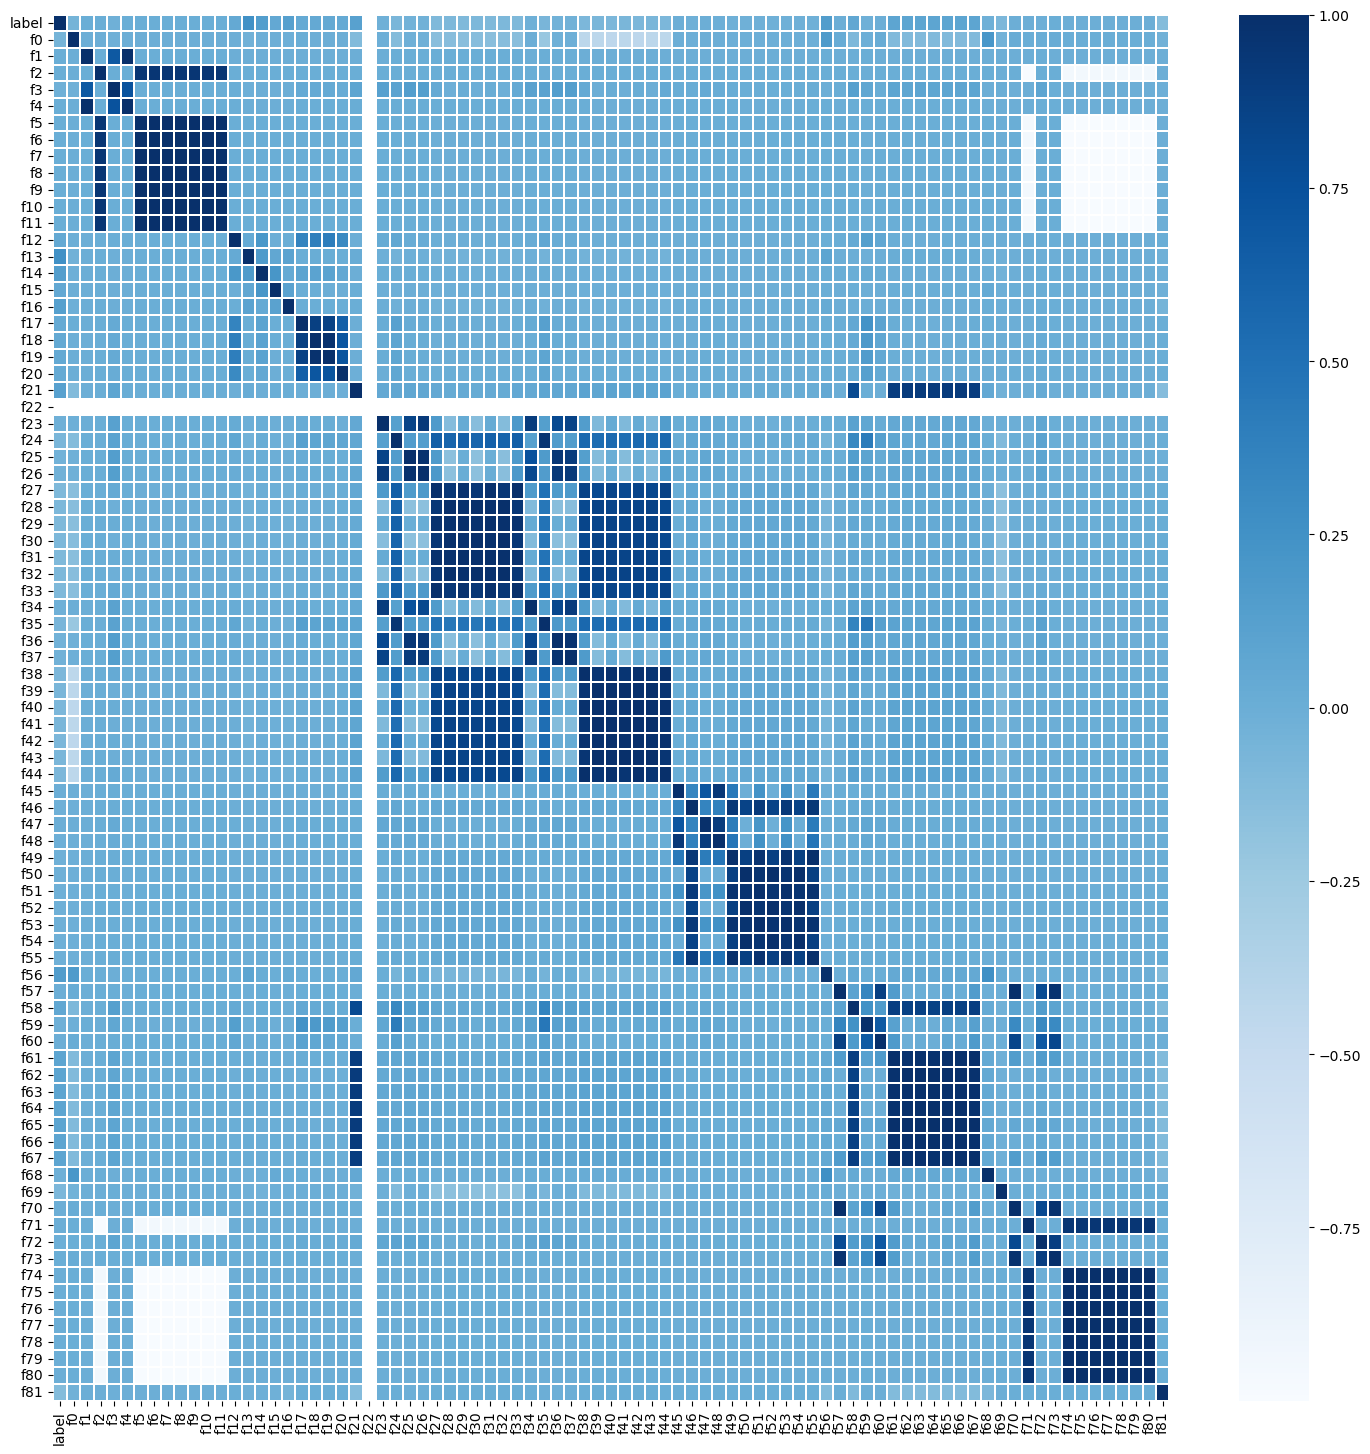

In [21]:
corr = df.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Blues")
plt.show()

#### All the features that highly correlated to each other are shown on the heatmap.
#### They all stay a long the diagonal of the square
#### We could recognize that there are 7 groups of features that mutually correlated, for example : {'f5', 'f6', 'f7', 'f8', 'f9','f10','f11'}, {f17', 'f18', 'f19', 'f20'}

In [22]:
df['f22'].value_counts()

f22
1    70720
Name: count, dtype: int64

In [23]:
# List of groups of highly correlated features
group1 = ['f5', 'f6', 'f7', 'f8', 'f9','f10','f11']
group2 = ['f17', 'f18', 'f19', 'f20']
group3 = ['f27', 'f28', 'f29', 'f30', 'f31','f32','f33']
group4 = ['f38', 'f39', 'f40', 'f41', 'f42','f43','f44']
group5 = ['f49', 'f50', 'f51', 'f52', 'f53','f54','f55']
group6 = ['f61', 'f62', 'f63', 'f64', 'f65','f66','f67']
group7 = ['f74', 'f75', 'f76', 'f77', 'f78','f79','f80']

groups = [group1, group2, group3, group4, group5, group6, group7]

In [24]:
# F22 contributed nothing to the dataset
df.drop(columns = ['f22'], inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70720 entries, 0 to 70719
Data columns (total 82 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   70720 non-null  int64  
 1   f0      70720 non-null  int32  
 2   f1      70720 non-null  float64
 3   f2      70720 non-null  float64
 4   f3      70720 non-null  float64
 5   f4      70720 non-null  float64
 6   f5      70720 non-null  float64
 7   f6      70720 non-null  float64
 8   f7      70720 non-null  float64
 9   f8      70720 non-null  float64
 10  f9      70720 non-null  float64
 11  f10     70720 non-null  float64
 12  f11     70720 non-null  float64
 13  f12     70720 non-null  int64  
 14  f13     70720 non-null  int64  
 15  f14     70720 non-null  int64  
 16  f15     70720 non-null  int64  
 17  f16     70720 non-null  int64  
 18  f17     70720 non-null  int64  
 19  f18     70720 non-null  int64  
 20  f19     70720 non-null  int64  
 21  f20     70720 non-null  int64  
 22

In [26]:

# Function to apply PCA to a group of features and replace the original features with one principal component
def apply_pca_to_group(data, group, n_components=1):
    pca = PCA(n_components=n_components)
    pca_components = pca.fit_transform(data[group])
    pca_column = f'PCA_{group[0]}'
    data[pca_column] = pca_components
    data.drop(columns=group,inplace=True)
    return data

# Apply PCA to each group and update the dataframe
for group in groups:
    df_pca = apply_pca_to_group(df, group, n_components=1)

# Display the updated dataframe
df_pca.head()


,label,f0,f1,f2,f3,f4,f12,f13,f14,f15,...,f72,f73,f81,PCA_f5,PCA_f17,PCA_f27,PCA_f38,PCA_f49,PCA_f61,PCA_f74
0,1,0,0.0,-43.0,0.0,0.0,0,0,0,0,...,0.0,0.0,241,-1.284314e+06,-0.007139,-47.800704,-41.391083,-18.32572,113.011278,-1.275940e+06
1,1,0,0.0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,231,-1.284428e+06,-0.007139,18.342978,24.752662,-18.32572,-51.023553,-1.276070e+06
2,1,0,0.0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,233,-1.284428e+06,-0.007139,-47.800704,-41.391083,-18.32572,525.744078,-1.276266e+06
3,1,0,0.0,-24.0,0.0,0.0,0,1,0,0,...,0.0,0.0,12,-1.284396e+06,-0.007139,18.342978,24.752662,-18.32572,-229.794052,-1.276279e+06
4,1,0,0.0,-38.0,0.0,0.0,0,0,0,0,...,0.0,0.0,241,-1.284327e+06,-0.007139,-47.800704,-41.391083,-18.32572,-127.749522,-1.276197e+06


In [27]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70720 entries, 0 to 70719
Data columns (total 43 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   label    70720 non-null  int64  
 1   f0       70720 non-null  int32  
 2   f1       70720 non-null  float64
 3   f2       70720 non-null  float64
 4   f3       70720 non-null  float64
 5   f4       70720 non-null  float64
 6   f12      70720 non-null  int64  
 7   f13      70720 non-null  int64  
 8   f14      70720 non-null  int64  
 9   f15      70720 non-null  int64  
 10  f16      70720 non-null  int64  
 11  f21      70720 non-null  int64  
 12  f23      70720 non-null  float64
 13  f24      70720 non-null  float64
 14  f25      70720 non-null  float64
 15  f26      70720 non-null  float64
 16  f34      70720 non-null  float64
 17  f35      70720 non-null  float64
 18  f36      70720 non-null  float64
 19  f37      70720 non-null  float64
 20  f45      70720 non-null  float64
 21  f46      707

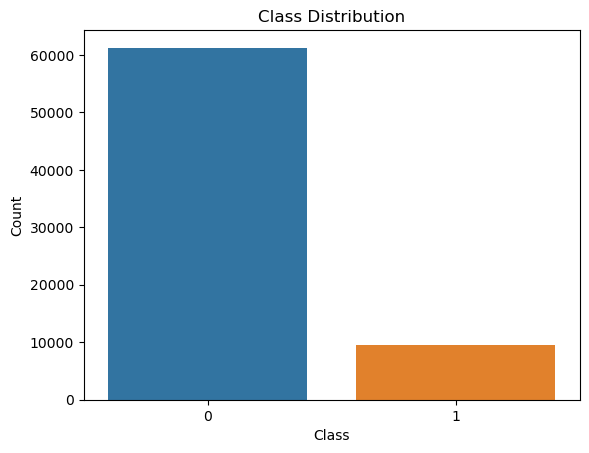

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the class distribution
# sns.countplot(x='label', hue= 'label',data=df_pca) 
sns.countplot(x='label', data=df_pca) 
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [29]:
from imblearn.over_sampling import SMOTE


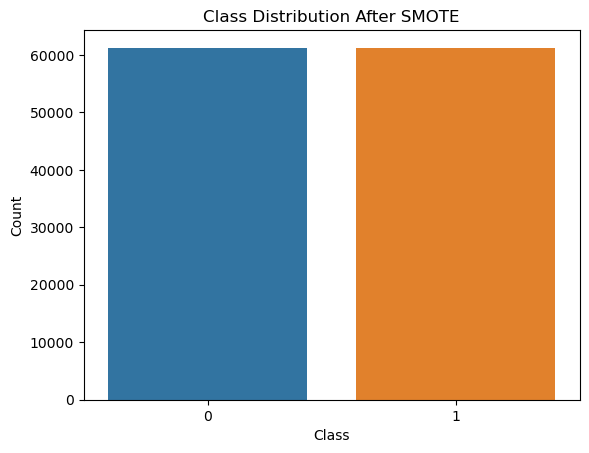

In [30]:

# Separate features and target variable
X = df_pca.drop(columns=['label'])
y = df_pca['label']

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_oversampled, y_oversampled = smote.fit_resample(X, y)

# Visualize the resampled class distribution
sns.countplot(x=y_oversampled)
# sns.countplot(x=y_oversampled, hue=y_oversampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [31]:
y_oversampled.value_counts()

label
1    61244
0    61244
Name: count, dtype: int64

In [32]:
from imblearn.under_sampling import RandomUnderSampler

# Assuming df_pca is the preprocessed dataset with PCA applied and 'label' is the target variable
# X = df_pca.drop(columns=['label'])
# y = df_pca['label']

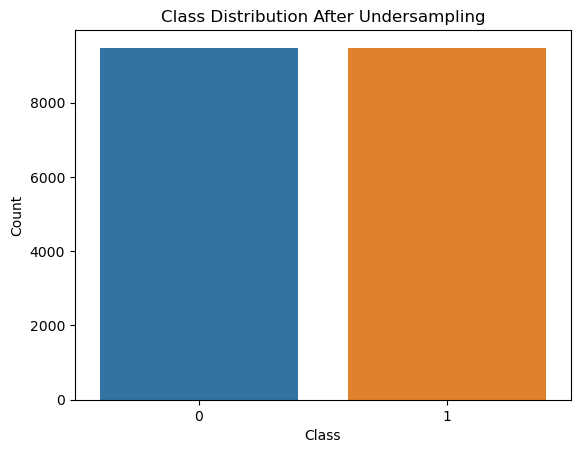

In [33]:
rus = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = rus.fit_resample(X, y)

# Visualize the resampled class distribution
# sns.countplot(x=y_undersampled, hue=y_undersampled)
sns.countplot(x=y_undersampled)
plt.title('Class Distribution After Undersampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [34]:
# Split the data into training and testing sets
# Apply Kfold cross-validation to evaluate the model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold



In [36]:
classifiers = [
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('logistic_regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('naive_bayes', GaussianNB()),
    ('xgboost', xgb.XGBClassifier(random_state=42))
]



In [37]:
# Initialize KFold
cv = KFold(n_splits=5, random_state=42, shuffle=True)

# Define custom scoring
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# Dictionary to store results
results = {name: {'accuracy': [], 'precision': [], 'recall': [], 'roc_auc': []} for name, _ in classifiers}

# Iterate through each classifier
for name, classifier in classifiers:
    # Create a pipeline with a scaler and the classifier
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize features by removing the mean and scaling to unit variance
        (name, classifier)
    ])
    
    # Evaluate the pipeline using cross-validation
    cv_results = cross_validate(pipeline, X_undersampled, y_undersampled, cv=cv, scoring=scoring)
    
    # Store the results
    results[name]['accuracy'] = cv_results['test_accuracy']
    results[name]['precision'] = cv_results['test_precision']
    results[name]['recall'] = cv_results['test_recall']
    results[name]['roc_auc'] = cv_results['test_roc_auc']


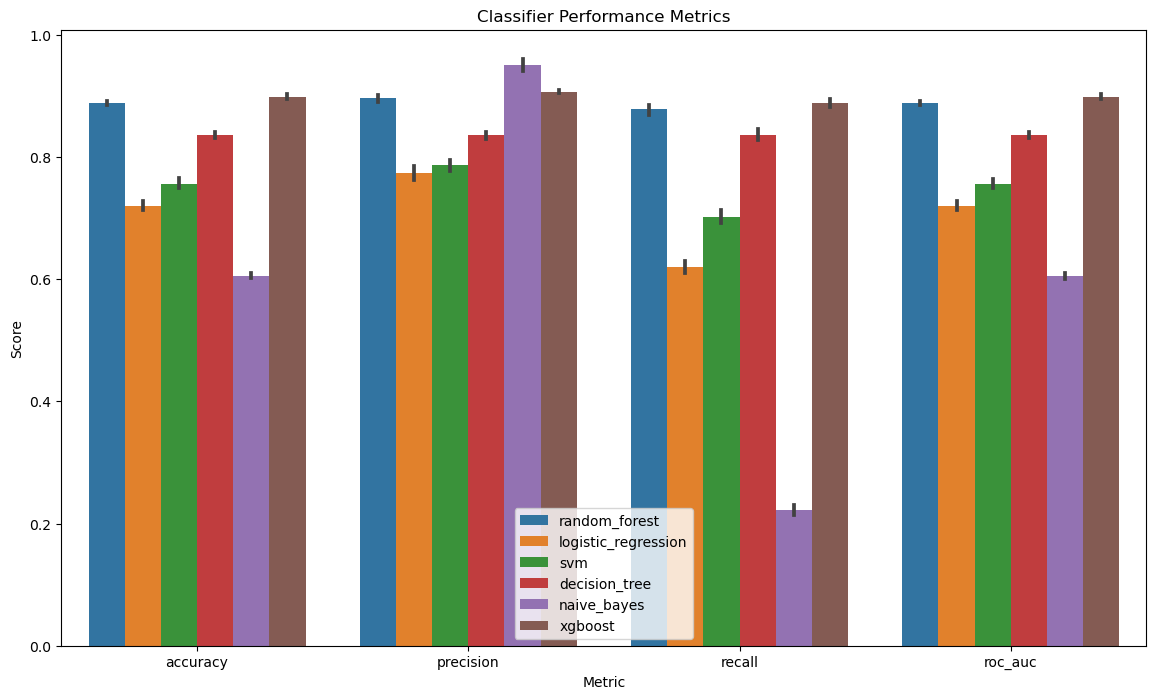

In [38]:
# Convert results to a DataFrame for easier plotting
data = []

for name in results:
    for metric in results[name]:
        for score in results[name][metric]:
            data.append({'Classifier': name, 'Metric': metric, 'Score': score})

results_df = pd.DataFrame(data)

# Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(x='Metric', y='Score', hue='Classifier', data=results_df)
plt.title('Classifier Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(loc='best')
plt.show()


In [39]:
results

{'random_forest': {'accuracy': array([0.88578212, 0.89026642, 0.8939314 , 0.89076517, 0.8823219 ]),
  'precision': array([0.88412017, 0.90224359, 0.89734043, 0.90218579, 0.90071311]),
  'recall': array([0.88364611, 0.87877211, 0.88976793, 0.87539767, 0.86103828]),
  'roc_auc': array([0.88574829, 0.89042939, 0.8939336 , 0.89069253, 0.88245754])},
 'logistic_regression': {'accuracy': array([0.71458718, 0.71010288, 0.73641161, 0.72110818, 0.71635884]),
  'precision': array([0.75604971, 0.77305906, 0.79564931, 0.76898118, 0.7777036 ]),
  'recall': array([0.61983914, 0.60613944, 0.63660338, 0.62831389, 0.61090718]),
  'roc_auc': array([0.71308676, 0.71157694, 0.73646431, 0.72066955, 0.71703086])},
 'svm': {'accuracy': array([0.74544975, 0.75705619, 0.77176781, 0.75065963, 0.75435356]),
  'precision': array([0.77141134, 0.79183673, 0.80163839, 0.77758112, 0.78978622]),
  'recall': array([0.68579088, 0.70655567, 0.72257384, 0.69883351, 0.69743052]),
  'roc_auc': array([0.744505  , 0.75777222,

In [40]:
classifiers = [
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('xgboost', xgb.XGBClassifier(random_state=42))
]



In [41]:
# Initialize KFold
cv = KFold(n_splits=5, random_state=44, shuffle=True)

# Define custom scoring
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# Dictionary to store results
results = {name: {'accuracy': [], 'precision': [], 'recall': [], 'roc_auc': []} for name, _ in classifiers}

# Iterate through each classifier
for name, classifier in classifiers:
    # Create a pipeline with a scaler and the classifier
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize features by removing the mean and scaling to unit variance
        (name, classifier)
    ])
    
    # Evaluate the pipeline using cross-validation
    cv_results = cross_validate(pipeline, X_oversampled, y_oversampled, cv=cv, scoring=scoring)
    
    # Store the results
    results[name]['accuracy'] = cv_results['test_accuracy']
    results[name]['precision'] = cv_results['test_precision']
    results[name]['recall'] = cv_results['test_recall']
    results[name]['roc_auc'] = cv_results['test_roc_auc']


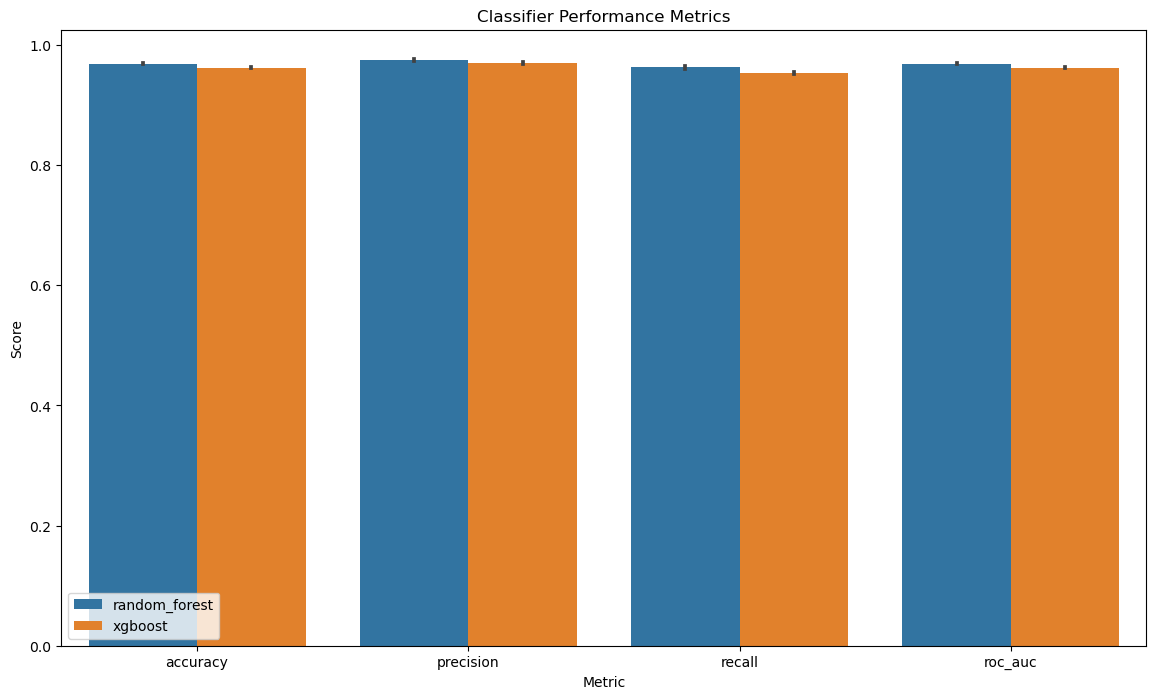

In [42]:
# Convert results to a DataFrame for easier plotting
data = []

for name in results:
    for metric in results[name]:
        for score in results[name][metric]:
            data.append({'Classifier': name, 'Metric': metric, 'Score': score})

results_df = pd.DataFrame(data)

# Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(x='Metric', y='Score', hue='Classifier', data=results_df)
plt.title('Classifier Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(loc='best')
plt.show()


In [43]:
results

{'random_forest': {'accuracy': array([0.96714017, 0.96995673, 0.97040575, 0.97093522, 0.96730212]),
  'precision': array([0.97492294, 0.97722976, 0.97669757, 0.97544293, 0.97185064]),
  'recall': array([0.95870883, 0.96282498, 0.96326194, 0.96620684, 0.96276423]),
  'roc_auc': array([0.96711068, 0.97001425, 0.97034274, 0.97093618, 0.96732128])},
 'xgboost': {'accuracy': array([0.96113968, 0.9619969 , 0.96175198, 0.96468955, 0.96105646]),
  'precision': array([0.97001336, 0.97025869, 0.968784  , 0.97236973, 0.96899802]),
  'recall': array([0.95141734, 0.95383494, 0.95354201, 0.95657497, 0.95292683]),
  'roc_auc': array([0.96110567, 0.96206273, 0.96167957, 0.96469121, 0.96109078])}}

#### From all the metrics above, we can see that the Random Forest Classifier and XGBoost Classifier perform well on the dataset and performe better on the oversampling dataset. 
#### We can further tune the hyperparameters of these models on the oversampling data to improve their performance.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.3, random_state=42)


In [47]:
#  Implement hyperparameter tuning using random search
# Define the hyperparameter grid for Random Forest Classifier

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 30, None],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
    
}


In [65]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and best score
print(f'Best parameters: {grid_search_rf.best_params_}')
print(f'Best ROC AUC score: {grid_search_rf.best_score_}')


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best ROC AUC score: 0.9930372225835283


In [66]:
best_parames = grid_search_rf.best_params_
rfc = RandomForestClassifier(**best_parames)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [67]:
# Evaluate the model: Precision, Recall, F1-score, and ROC AUC
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))
# Evaluate the model: Recall
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))



Accuracy: 0.9682967317059896
ROC AUC: 0.9682635635032193
Recall: 0.9634460459253575
Precision: 0.9724527049452373


In [ ]:
# from scipy.stats import uniform, randint


In [58]:
param_grid_xgb = {
    'n_estimators': [100,  300],
    'learning_rate': [0.01, 0.05,],
    'subsample': [0.4, 0.8 ],
    'max_depth': [3, 6, 9],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
}

In [59]:
from xgboost import XGBClassifier


In [60]:
# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best ROC AUC score: {grid_search.best_score_}')


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


c:\Users\ilook\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:07:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}
Best ROC AUC score: 0.992843024543739


In [71]:
best_parames = grid_search.best_params_
xgbc = XGBClassifier(**best_parames)
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)

In [72]:
# Evaluate the model: Precision, Recall, F1-score, and ROC AUC
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))
# Evaluate the model: Recall
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))


Accuracy: 0.9633711595504395
ROC AUC: 0.9633225809796205
Recall: 0.9562667835808626
Precision: 0.9695504806356615


In [76]:

# Predict probabilities for the test set
rf_prob = rfc.predict_proba(X_test)[:, 1]
xgb_prob = xgbc.predict_proba(X_test)[:, 1]

# Compute FPR and TPR for both models
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_prob)

# Calculate the AUC for both models
rf_auc = roc_auc_score(y_test, rf_prob)
xgb_auc = roc_auc_score(y_test, xgb_prob)

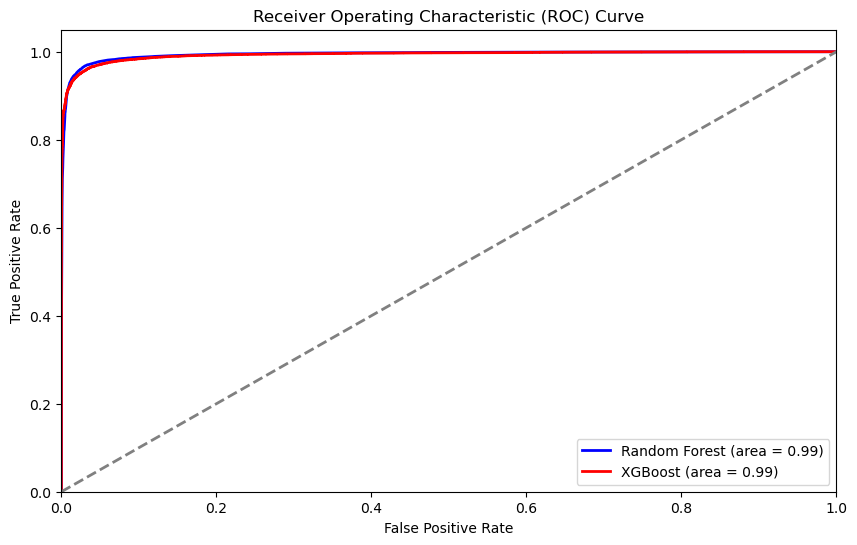

In [77]:
# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label='Random Forest (area = %0.2f)' % rf_auc)
plt.plot(xgb_fpr, xgb_tpr, color='red', lw=2, label='XGBoost (area = %0.2f)' % xgb_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



In [78]:
import pickle

In [79]:
# Save the Random Forest model
with open('rfc_model.pkl', 'wb') as file:
    pickle.dump(rfc, file)

# Save the XGBoost model
with open('xgbc_model.pkl', 'wb') as file:
    pickle.dump(xgbc, file)

In [5]:
data3 = pd.read_csv('data2.csv')

In [10]:
data3

,_id,label,f0,f1,f2,f3,f4,f5,f6,f7,...,f73,f74,f75,f76,f77,f78,f79,f80,f81,Unnamed: 84
0,667b34831b443137f25380e8,1,VIP0,0.00,-43.0,0.0000,0.0,-43.0,-43.0,-43.0,...,0.0,238.0,238.0,238.0,238.0,238.0,238.0,238.0,243010,NaN
1,667b34831b443137f25380ea,1,VIP0,0.00,0.0,0.0000,0.0,0.0,0.0,0.0,...,0.0,189.0,189.0,189.0,189.0,189.0,189.0,189.0,236020,NaN
2,667b34831b443137f25380ec,1,VIP0,0.00,0.0,0.0000,0.0,0.0,0.0,0.0,...,0.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,236040,NaN
3,667b34831b443137f25380ee,1,VIP0,0.00,-24.0,0.0000,0.0,-12.0,-12.0,-12.0,...,0.0,110.0,110.0,110.0,110.0,110.0,110.0,110.0,103010,NaN
4,667b34831b443137f2538292,1,VIP0,0.00,-38.0,0.0000,0.0,-38.0,-38.0,-38.0,...,0.0,141.0,141.0,141.0,141.0,141.0,141.0,141.0,243010,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70715,667c1dce575fc03d58909e30,0,VIP0,0.00,0.0,0.0000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
70716,667c1dce575fc03d58909eff,0,VIP0,0.00,0.0,0.0000,0.0,0.0,0.0,0.0,...,0.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,236050,NaN
70717,667c1dd2575fc03d5890bbfb,0,VIP0,420.25,-41.0,4.5277,20.5,0.0,-41.0,-20.5,...,2.0,168.0,164.0,166.0,164.0,166.0,164.0,168.0,243040,NaN
70718,667c1dd3575fc03d5890c07b,0,VIP0,0.00,-57.0,0.0000,0.0,-57.0,-57.0,-57.0,...,0.0,547.0,547.0,547.0,547.0,547.0,547.0,547.0,243010,NaN


In [34]:
new_data = data3.sample().to_json(orient='records')

In [35]:
new_data

'[{"label":0.0,"f0":3,"f1":0.0,"f2":-15.0,"f3":0.0,"f4":0.0,"f12":0.0,"f13":0.0,"f14":0.0,"f15":0.0,"f16":0.0,"f21":85.0,"f23":0.0,"f24":29.0,"f25":0.0,"f26":0.0,"f34":0.0,"f35":48.0,"f36":0.0,"f37":0.0,"f45":0.0,"f46":0.0,"f47":0.0,"f48":0.0,"f56":500.0,"f57":0.0,"f58":86.0,"f59":0.0,"f60":0.0,"f68":2,"f69":10,"f70":0.0,"f71":61.0,"f72":0.0,"f73":0.0,"f81":245,"PCA_f5":-1284370.1356532155,"PCA_f17":-0.0071385538,"PCA_f27":-34.5720788949,"PCA_f38":-28.1619356953,"PCA_f49":-18.3254612004,"PCA_f61":-349.9820946494,"PCA_f74":-1276390.4333535051}]'

In [12]:
#  add new_data as last row of data3 without using append
data3 = pd.concat([data3, new_data], ignore_index=True)

####Code prepare for Flask API:

In [20]:
# create a json object that contains value for 1 row of data2
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.decomposition import PCA

data3 = pd.read_csv('data2.csv')
new_data = data3.sample().to_json(orient='records')
new_data = pd.read_json(new_data, typ='series')
data3.loc[len(data3)] = new_data
data3.drop(columns=['_id','Unnamed: 84','f22'], inplace=True)
for col in data3.columns:
    data3.fillna({col:data3[col].mode()[0]}, inplace=True)
le = LabelEncoder()
for i in data3.columns:
    if data3[i].dtype == 'object':
        data3[i] = le.fit_transform(data3[i])
group1 = ['f5', 'f6', 'f7', 'f8', 'f9','f10','f11']
group2 = ['f17', 'f18', 'f19', 'f20']
group3 = ['f27', 'f28', 'f29', 'f30', 'f31','f32','f33']
group4 = ['f38', 'f39', 'f40', 'f41', 'f42','f43','f44']
group5 = ['f49', 'f50', 'f51', 'f52', 'f53','f54','f55']
group6 = ['f61', 'f62', 'f63', 'f64', 'f65','f66','f67']
group7 = ['f74', 'f75', 'f76', 'f77', 'f78','f79','f80']

groups = [group1, group2, group3, group4, group5, group6, group7]
# convert new_data from json to dictionary
def apply_pca_to_group(data, group, n_components=1):
    pca = PCA(n_components=n_components)
    pca_components = pca.fit_transform(data[group])
    pca_column = f'PCA_{group[0]}'
    data[pca_column] = pca_components
    data.drop(columns=group,inplace=True)
    return data

# Apply PCA to each group and update the dataframe
for group in groups:
    data3_pca = apply_pca_to_group(data3, group, n_components=1)
data_test = data3_pca.iloc[-1].drop('label').values.reshape(1, -1)


C:\Users\ECDD0079\AppData\Local\Temp\ipykernel_21124\771972250.py:8: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  new_data = pd.read_json(new_data, typ='series')


In [ ]:
rfc.predict(data_test).tolist()

In [ ]:
# docker build -t prediction_model_api .
